Demand Forecasting

In [38]:
!pip install pytrends


In [83]:
from pytrends.request import TrendReq

pytrends = TrendReq()
keywords = [ "Foldable phones", "ANC headphones", "Budget gaming laptop"]
pytrends.build_payload(keywords, timeframe='today 5-y', geo='US')

data = pytrends.interest_over_time()
print(data)


            Foldable phones  ANC headphones  Budget gaming laptop  isPartial
date                                                                        
2020-02-02                7              22                    19      False
2020-02-09               19              15                    22      False
2020-02-16               12              17                    20      False
2020-02-23               12              15                    17      False
2020-03-01                8              18                    17      False
...                     ...             ...                   ...        ...
2025-01-05               12              76                    22      False
2025-01-12               12              62                    20      False
2025-01-19               12              53                    26      False
2025-01-26                9              63                    22      False
2025-02-02               10              60                    23       True

/usr/local/lib/python3.11/dist-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


In [84]:
import pandas as pd

# Load and clean data
data = data.drop(columns=['isPartial'])  # Remove isPartial column
data = data.fillna(0)  # Fill missing values with 0
data.index = pd.to_datetime(data.index)  # Ensure date is in datetime format

print(data.head())  # Check cleaned data


            Foldable phones  ANC headphones  Budget gaming laptop
date                                                             
2020-02-02                7              22                    19
2020-02-09               19              15                    22
2020-02-16               12              17                    20
2020-02-23               12              15                    17
2020-03-01                8              18                    17


In [85]:
# Create lag features (past 7, 14, 30 days)
for lag in [7, 14, 30]:
    for col in data.columns:
        data[f"{col}_lag_{lag}"] = data[col].shift(lag)

data.dropna(inplace=True)  # Drop rows with missing values due to shifting
print(data.head())  # Check the new dataset


            Foldable phones  ANC headphones  Budget gaming laptop  \
date                                                                
2022-03-20                7              32                    24   
2022-03-27                6              32                    15   
2022-04-03                5              28                    20   
2022-04-10                6              30                    18   
2022-04-17                8              33                    17   

            Foldable phones_lag_7  ANC headphones_lag_7  \
date                                                      
2022-03-20                    0.0                  36.0   
2022-03-27                    0.0                  33.0   
2022-04-03                    5.0                  35.0   
2022-04-10                    0.0                  43.0   
2022-04-17                    5.0                  32.0   

            Budget gaming laptop_lag_7  Foldable phones_lag_14  \
date                                

In [86]:
from sklearn.model_selection import train_test_split

# Define input features (X) and target variable (y)
X = data.drop(columns=keywords)  # Features (all except original interest scores)
y = data[keywords]  # Target variable (the interest scores)

# Split data into training and testing (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print("Training data size:", X_train.shape)
print("Testing data size:", X_test.shape)


Training data size: (120, 45)
Testing data size: (31, 45)


In [87]:
from xgboost import XGBRegressor

# Train the model
model = XGBRegressor(n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)

print("Model training complete!")


Model training complete!


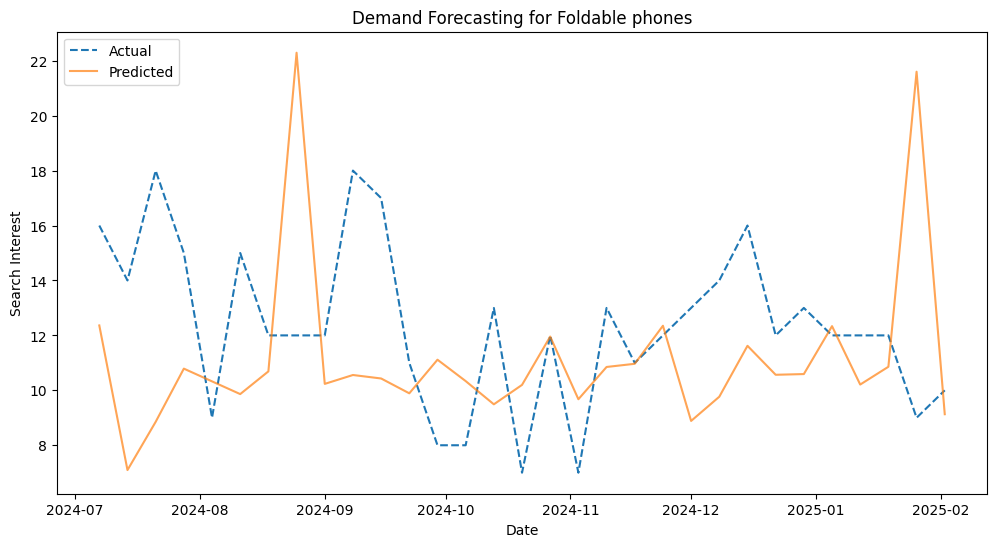

In [88]:
import matplotlib.pyplot as plt

# Predict
y_pred = model.predict(X_test)

# Convert to DataFrame for visualization
y_pred_df = pd.DataFrame(y_pred, index=y_test.index, columns=y_test.columns)

# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test["Foldable phones"], label="Actual", linestyle="dashed")
plt.plot(y_test.index, y_pred_df["Foldable phones"], label="Predicted", alpha=0.7)
plt.legend()
plt.title("Demand Forecasting for Foldable phones")
plt.xlabel("Date")
plt.ylabel("Search Interest")
plt.show()


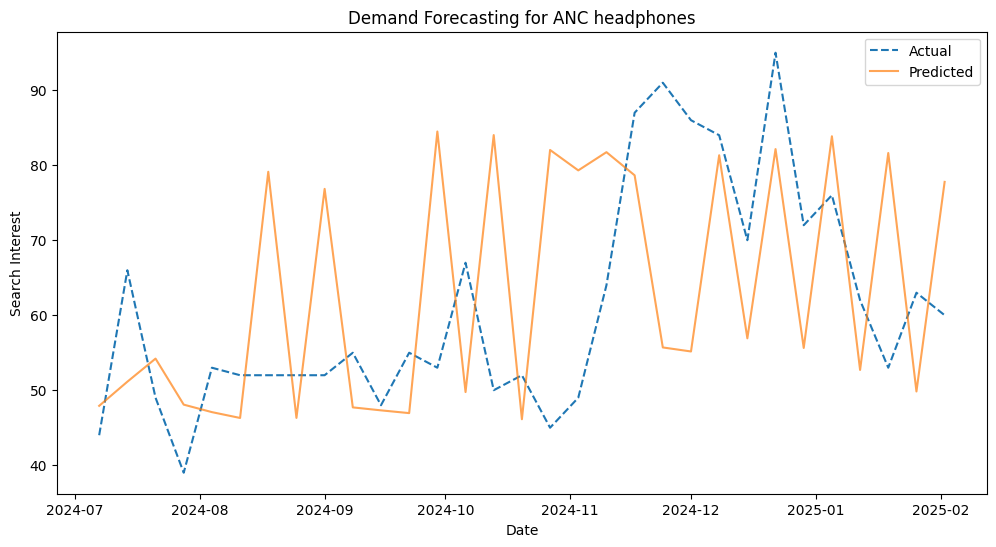

In [89]:
# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test["ANC headphones"], label="Actual", linestyle="dashed")
plt.plot(y_test.index, y_pred_df["ANC headphones"], label="Predicted", alpha=0.7)
plt.legend()
plt.title("Demand Forecasting for ANC headphones")
plt.xlabel("Date")
plt.ylabel("Search Interest")
plt.show()


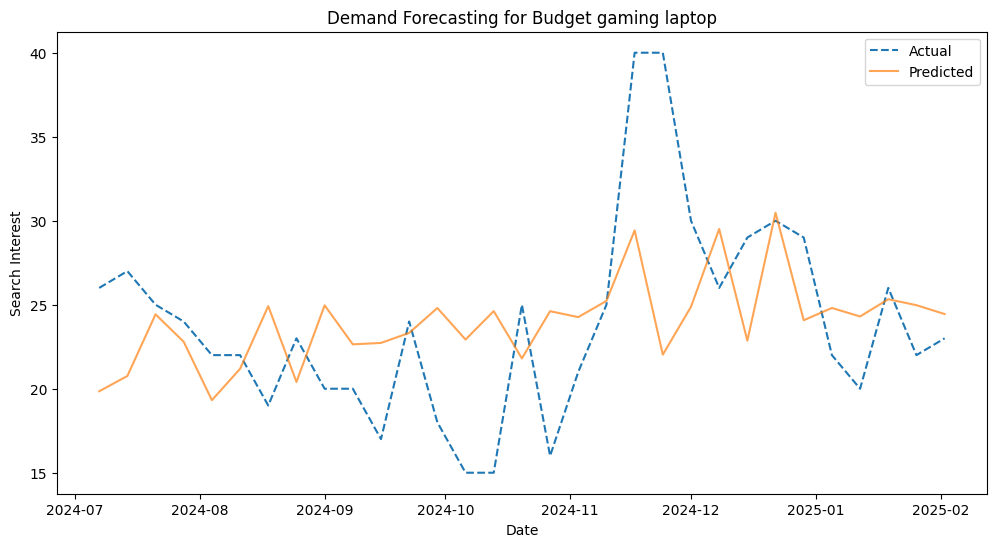

In [90]:
# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test["Budget gaming laptop"], label="Actual", linestyle="dashed")
plt.plot(y_test.index, y_pred_df["Budget gaming laptop"], label="Predicted", alpha=0.7)
plt.legend()
plt.title("Demand Forecasting for Budget gaming laptop")
plt.xlabel("Date")
plt.ylabel("Search Interest")
plt.show()

In [91]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate errors
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5  # Root Mean Squared Error

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")


MAE: 7.94
MSE: 140.62
RMSE: 11.86


Competitor Analysis

In [98]:
from pytrends.request import TrendReq

pytrends = TrendReq()
brands = ["Apple", "Samsung", "Google"]

pytrends.build_payload(brands, timeframe='today 5-y', geo='US')

brand_data = pytrends.interest_over_time().drop(columns=['isPartial'])
print(brand_data.head())


            Apple  Samsung  Google
date                              
2020-02-02     10        5      60
2020-02-09     10        6      60
2020-02-16     10        6      54
2020-02-23     10        5      60
2020-03-01     10        5      57


/usr/local/lib/python3.11/dist-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


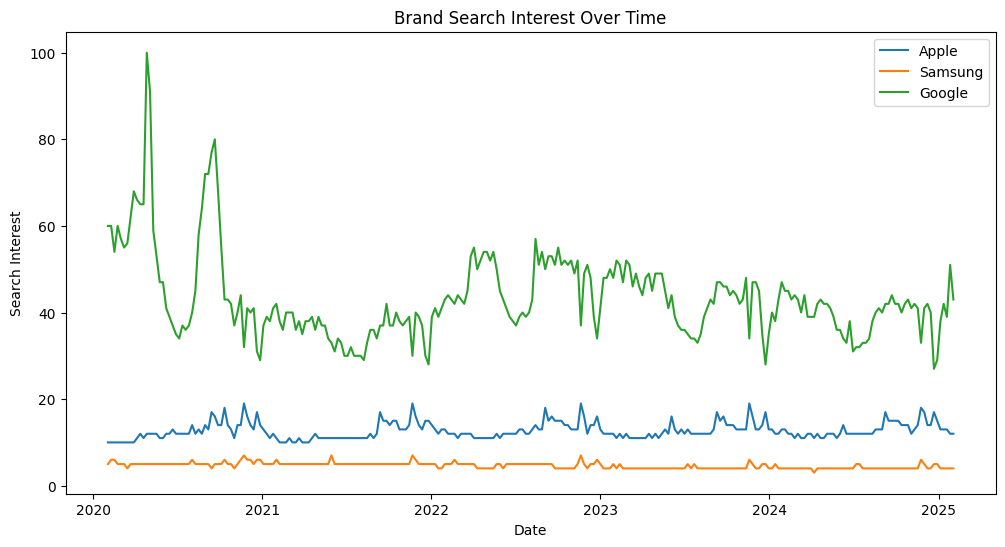

In [99]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for col in brand_data.columns:
    plt.plot(brand_data.index, brand_data[col], label=col)

plt.title("Brand Search Interest Over Time")
plt.xlabel("Date")
plt.ylabel("Search Interest")
plt.legend()
plt.show()


In [100]:
#compare year over growth
brand_data['year'] = brand_data.index.year
growth_rates = brand_data.groupby('year').mean().pct_change() * 100
print(growth_rates)


         Apple    Samsung     Google
year                                
2020       NaN        NaN        NaN
2021 -4.042580  -0.992556 -31.549167
2022  6.973059  -7.142857  29.383378
2023 -1.305381 -11.817279  -6.522062
2024  1.172539  -1.290714  -9.470673
2025 -2.789318  -3.255814   8.481881


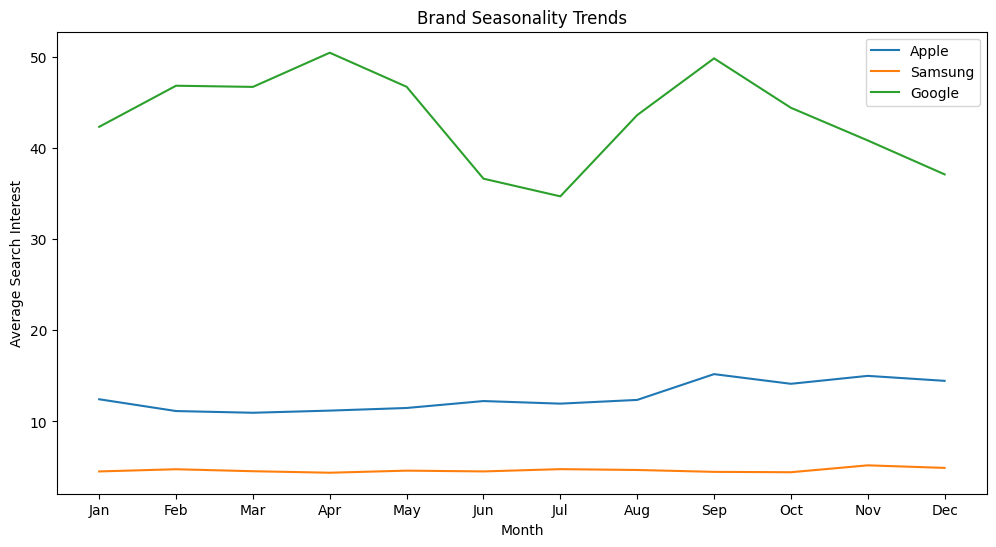

In [101]:
#peak season for each brand
brand_data['month'] = brand_data.index.month
monthly_trends = brand_data.groupby('month').mean()

plt.figure(figsize=(12, 6))
for col in brands:
    plt.plot(monthly_trends.index, monthly_trends[col], label=col)

plt.title("Brand Seasonality Trends")
plt.xlabel("Month")
plt.ylabel("Average Search Interest")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend()
plt.show()


Seasonal and Event Based Trend

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


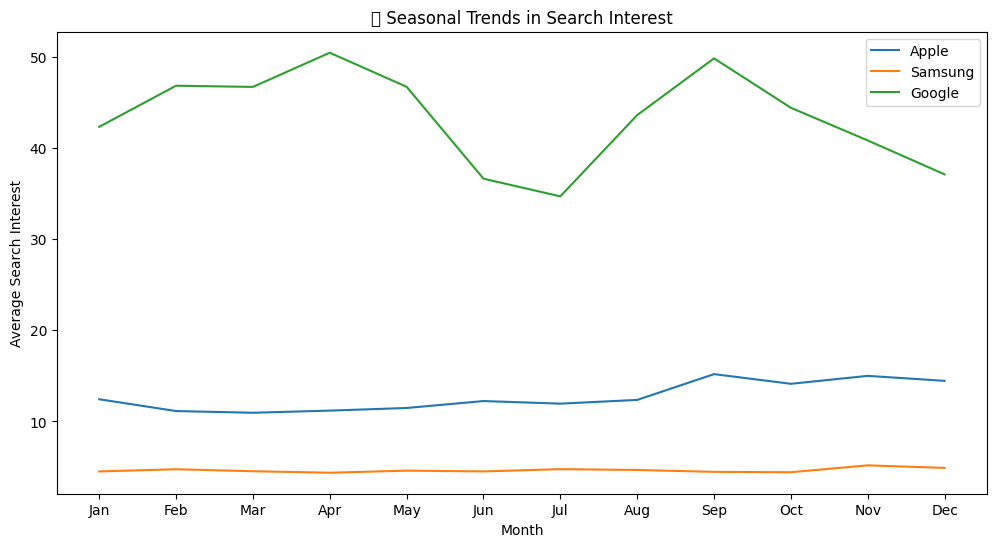

In [102]:
import pandas as pd
import matplotlib.pyplot as plt

# Extracting month and year
brand_data['month'] = brand_data.index.month
brand_data['year'] = brand_data.index.year

# Group by month and take the average for each month
monthly_trends = brand_data.groupby('month').mean()

# Plot seasonality
plt.figure(figsize=(12, 6))
for brand in brand_data.columns[:-2]:  # Exclude 'month' and 'year'
    plt.plot(monthly_trends.index, monthly_trends[brand], label=brand)

plt.title("📊 Seasonal Trends in Search Interest")
plt.xlabel("Month")
plt.ylabel("Average Search Interest")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend()
plt.show()


In [104]:
# Compute daily percentage change
brand_data['pct_change'] = brand_data.iloc[:, 0].pct_change() * 100

# Find spikes (e.g., >50% increase in a day)
spike_threshold = 20
event_spikes = brand_data[brand_data['pct_change'] > spike_threshold]

print("🔍 Detected Event-Based Spikes:")
print(event_spikes)


🔍 Detected Event-Based Spikes:
            Apple  Samsung  Google  year  month  pct_change
date                                                       
2020-09-13     17        4      77  2020      9   30.769231
2020-10-11     18        6      43  2020     10   28.571429
2020-11-08     14        5      40  2020     11   27.272727
2020-11-22     19        7      32  2020     11   35.714286
2020-12-20     17        6      31  2020     12   30.769231
2021-09-12     17        5      37  2021      9   41.666667
2021-11-21     19        7      30  2021     11   35.714286
2022-09-04     18        5      50  2022      9   38.461538
2022-11-20     19        7      37  2022     11   46.153846
2023-06-04     16        4      44  2023      6   33.333333
2023-09-10     17        4      47  2023      9   30.769231
2023-11-19     19        6      34  2023     11   46.153846
2023-12-24     17        5      28  2023     12   21.428571
2024-09-08     17        4      42  2024      9   30.769231
2024-11-2